### Combining data sets

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

One of the key tasks in data science is combining infomation from two sources, for example adding gene expression data from two RNASeq experiments, combining protein annotations and structural data, or adding taxonomy to species distribution data.  Pandas has several ways to do this.  You've used a basic concatenation to add dataframes together in Class 3, but there are much more sophisticated ways of combining data.

To discuss joining dataframes we need a bit of vocabulary.  If we have two dataframes with some overlap in what they cover:  

Adding all the data together - Full outer join.   
Just outputing the overlap - Inner join.  
Adding the overlap to one of the dataframes - left or right join.  


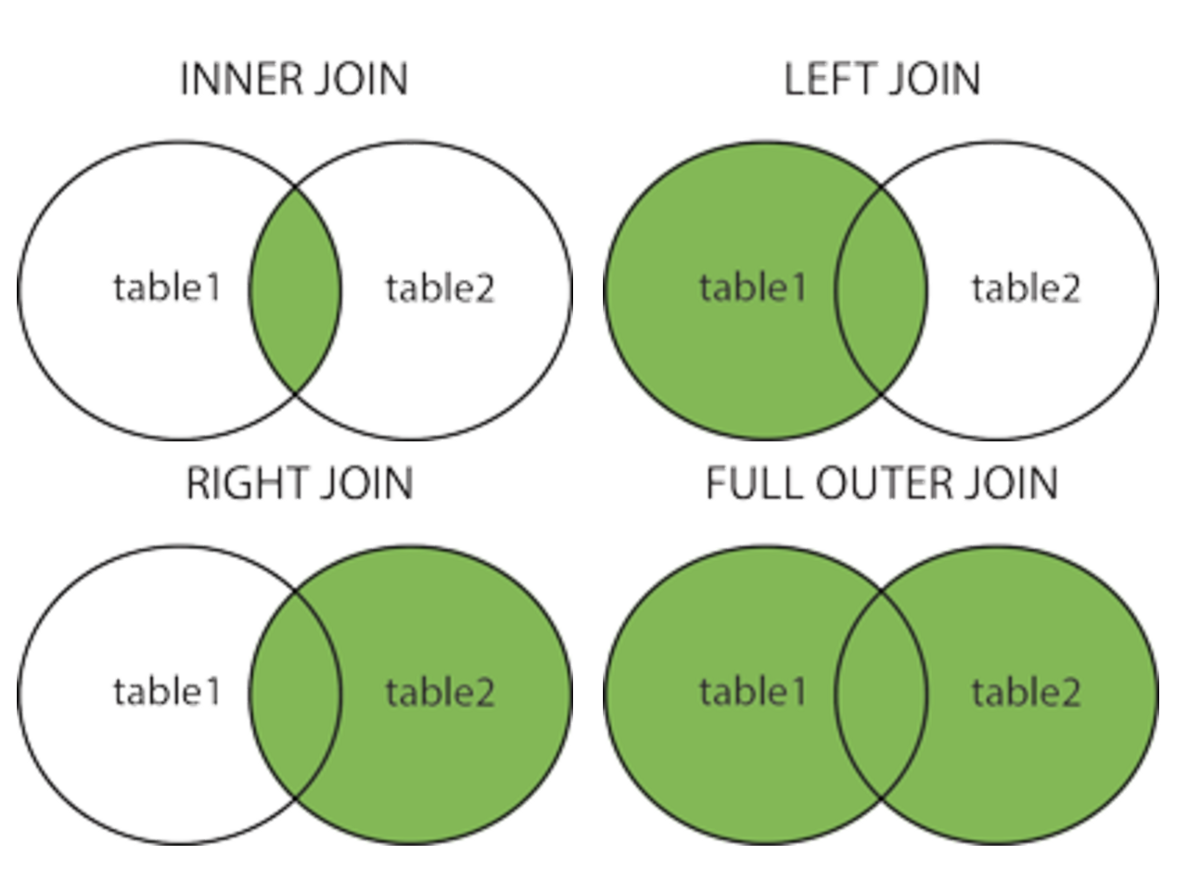

There are three ways of combiing dataframes in pandas

concat() - combine DataFrames across rows or columns  
merge() - combine dataframes on a common columns or index  
join() - combine dataframes on a key column or an index  

We'll return to the greenland chick data from week 2 and add in climate data for each location.

In [2]:
nests = pd.read_csv("../Week2/Greenland_nests.csv")

In [3]:
nests

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225


In [4]:
climate = pd.read_csv("Greenland_climate.csv")

In [5]:
climate

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours)
0,Tasiilaq,1.95,880,3.0,-10.4,80,5,5.1
1,Ittoqqortoormiit,-4.30,230,1.0,-18.4,30,2,2.5
2,Nuuk,-3.20,875,1.8,-10.9,105,4,3.9
3,Ilulissat,-3.85,270,1.0,-18.8,40,4,4.4
4,Qaanaq,-4.10,120,0.0,-29.1,20,1,2.1
5,Maniitsoq,-3.90,180,1.0,-23.2,55,3,2.8
6,Sisimiut,-3.30,130,1.0,-25.6,50,2,2.6


The dataframes don't quite overlap.  We have chick data but no climate data for Disko Bay and climate data but no chick data for Ilulissat

Concatenating simply sticks the dataframes together side by side.

In [6]:
pd.concat([nests, climate])

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours)
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tasiilaq,1.95,880.0,3.0,-10.4,80.0,5.0,5.1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ittoqqortoormiit,-4.30,230.0,1.0,-18.4,30.0,2.0,2.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nuuk,-3.20,875.0,1.8,-10.9,105.0,4.0,3.9


If we specify axis one then it sticks the climate data to the right side of the nest data on each row, but without matching the rows.

In [7]:
pd.concat([nests, climate], axis=1)

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours)
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356,Tasiilaq,1.95,880,3.0,-10.4,80,5,5.1
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523,Ittoqqortoormiit,-4.30,230,1.0,-18.4,30,2,2.5
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113,Nuuk,-3.20,875,1.8,-10.9,105,4,3.9
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67,Ilulissat,-3.85,270,1.0,-18.8,40,4,4.4
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266,Qaanaq,-4.10,120,0.0,-29.1,20,1,2.1
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734,Maniitsoq,-3.90,180,1.0,-23.2,55,3,2.8
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225,Sisimiut,-3.30,130,1.0,-25.6,50,2,2.6


Pandas does not see what these dataframes have in common.  If we rename 'Nesting Site' as 'Town' does this help?

In [8]:
nests.rename(columns = {'Nesting Site':'Town'}, inplace = True)

In [9]:
pd.concat([nests, climate])

,Town,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours)
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Tasiilaq,NaN,NaN,NaN,NaN,NaN,NaN,1.95,880.0,3.0,-10.4,80.0,5.0,5.1
1,Ittoqqortoormiit,NaN,NaN,NaN,NaN,NaN,NaN,-4.30,230.0,1.0,-18.4,30.0,2.0,2.5
2,Nuuk,NaN,NaN,NaN,NaN,NaN,NaN,-3.20,875.0,1.8,-10.9,105.0,4.0,3.9


Now it realises that 'Town' is the same for both but does not match them.  
If we do an inner join with concat it returns the shared column - 'Towns', but nothing else

In [10]:
pd.concat([nests, climate], join="inner")

,Town
0,Qaanaq
1,Sisimiut
2,Maniitsoq
3,Tasiilaq
4,Ittoqqortoormiit
5,Nuuk
6,Disko Bay
0,Tasiilaq
1,Ittoqqortoormiit
2,Nuuk


To join these as we'd wish we need to specify which column is the key - the shared infomation - and how much of the rest of the infomation we want to keep.   We do this using merge.

In [11]:
climate.merge(nests)

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours),0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Tasiilaq,1.95,880,3.0,-10.4,80,5,5.1,0.34,0.45,0.12,0.09,0.00,67
1,Ittoqqortoormiit,-4.30,230,1.0,-18.4,30,2,2.5,0.44,0.25,0.31,0.00,0.00,266
2,Nuuk,-3.20,875,1.8,-10.9,105,4,3.9,0.02,0.57,0.23,0.13,0.05,734
3,Qaanaq,-4.10,120,0.0,-29.1,20,1,2.1,0.21,0.00,0.57,0.22,0.00,356
4,Maniitsoq,-3.90,180,1.0,-23.2,55,3,2.8,0.00,0.22,0.56,0.17,0.05,2113
5,Sisimiut,-3.30,130,1.0,-25.6,50,2,2.6,0.00,0.34,0.65,0.01,0.00,523


Pandas has guessed we want to merge on the only column the dataframes have in common - 'Town'.  If there are no common columns we have to specifiy where the match is to be made.  
If we return 'Town' to 'Nesting site' in the bird data we can still merge the datasets if we tell panads what to do.  

In [12]:
nests.rename(columns = {'Town':'Nesting Site'}, inplace = True)

In [13]:
nests.columns

Index(['Nesting Site', '0 chicks', '1 chick', '2 chicks', '3 chicks ',
       '>3 chicks', 'Nests assessed'],
      dtype='object')

In [14]:
climate.merge(nests, left_on="Town", right_on="Nesting Site")

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours),Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Tasiilaq,1.95,880,3.0,-10.4,80,5,5.1,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67
1,Ittoqqortoormiit,-4.30,230,1.0,-18.4,30,2,2.5,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266
2,Nuuk,-3.20,875,1.8,-10.9,105,4,3.9,Nuuk,0.02,0.57,0.23,0.13,0.05,734
3,Qaanaq,-4.10,120,0.0,-29.1,20,1,2.1,Qaanaq,0.21,0.00,0.57,0.22,0.00,356
4,Maniitsoq,-3.90,180,1.0,-23.2,55,3,2.8,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113
5,Sisimiut,-3.30,130,1.0,-25.6,50,2,2.6,Sisimiut,0.00,0.34,0.65,0.01,0.00,523


We have also lost data!  The merge has returned only the inner join - those rows for which there are values in both dataframes.  We can change this behavoir in merge.

outer gives us everything with NaN for values missing form each dataframe

In [47]:
climate.merge(nests, left_on="Town", right_on="Nesting Site", how='outer')

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours),Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Tasiilaq,1.95,880.0,3.0,-10.4,80.0,5.0,5.1,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67.0
1,Ittoqqortoormiit,-4.30,230.0,1.0,-18.4,30.0,2.0,2.5,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266.0
2,Nuuk,-3.20,875.0,1.8,-10.9,105.0,4.0,3.9,Nuuk,0.02,0.57,0.23,0.13,0.05,734.0
3,Ilulissat,-3.85,270.0,1.0,-18.8,40.0,4.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Qaanaq,-4.10,120.0,0.0,-29.1,20.0,1.0,2.1,Qaanaq,0.21,0.00,0.57,0.22,0.00,356.0
5,Maniitsoq,-3.90,180.0,1.0,-23.2,55.0,3.0,2.8,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113.0
6,Sisimiut,-3.30,130.0,1.0,-25.6,50.0,2.0,2.6,Sisimiut,0.00,0.34,0.65,0.01,0.00,523.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disko Bay,0.11,0.42,0.24,0.23,0.00,225.0


left gives us everything in climate

In [48]:
climate.merge(nests, left_on="Town", right_on="Nesting Site", how='left')

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours),Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Tasiilaq,1.95,880,3.0,-10.4,80,5,5.1,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67.0
1,Ittoqqortoormiit,-4.30,230,1.0,-18.4,30,2,2.5,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266.0
2,Nuuk,-3.20,875,1.8,-10.9,105,4,3.9,Nuuk,0.02,0.57,0.23,0.13,0.05,734.0
3,Ilulissat,-3.85,270,1.0,-18.8,40,4,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Qaanaq,-4.10,120,0.0,-29.1,20,1,2.1,Qaanaq,0.21,0.00,0.57,0.22,0.00,356.0
5,Maniitsoq,-3.90,180,1.0,-23.2,55,3,2.8,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113.0
6,Sisimiut,-3.30,130,1.0,-25.6,50,2,2.6,Sisimiut,0.00,0.34,0.65,0.01,0.00,523.0


right gives us everything in nests

In [49]:
climate.merge(nests, left_on="Town", right_on="Nesting Site", how='right')

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours),Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Qaanaq,-4.10,120.0,0.0,-29.1,20.0,1.0,2.1,Qaanaq,0.21,0.00,0.57,0.22,0.00,356
1,Sisimiut,-3.30,130.0,1.0,-25.6,50.0,2.0,2.6,Sisimiut,0.00,0.34,0.65,0.01,0.00,523
2,Maniitsoq,-3.90,180.0,1.0,-23.2,55.0,3.0,2.8,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113
3,Tasiilaq,1.95,880.0,3.0,-10.4,80.0,5.0,5.1,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67
4,Ittoqqortoormiit,-4.30,230.0,1.0,-18.4,30.0,2.0,2.5,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266
5,Nuuk,-3.20,875.0,1.8,-10.9,105.0,4.0,3.9,Nuuk,0.02,0.57,0.23,0.13,0.05,734
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disko Bay,0.11,0.42,0.24,0.23,0.00,225


we can replace the NaNs with whatever we want

In [51]:
climate.merge(nests, left_on="Town", right_on="Nesting Site", how='left').fillna({"Nesting Site": "not-surveyed"})

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours),Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Tasiilaq,1.95,880,3.0,-10.4,80,5,5.1,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67.0
1,Ittoqqortoormiit,-4.30,230,1.0,-18.4,30,2,2.5,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266.0
2,Nuuk,-3.20,875,1.8,-10.9,105,4,3.9,Nuuk,0.02,0.57,0.23,0.13,0.05,734.0
3,Ilulissat,-3.85,270,1.0,-18.8,40,4,4.4,not-surveyed,NaN,NaN,NaN,NaN,NaN,NaN
4,Qaanaq,-4.10,120,0.0,-29.1,20,1,2.1,Qaanaq,0.21,0.00,0.57,0.22,0.00,356.0
5,Maniitsoq,-3.90,180,1.0,-23.2,55,3,2.8,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113.0
6,Sisimiut,-3.30,130,1.0,-25.6,50,2,2.6,Sisimiut,0.00,0.34,0.65,0.01,0.00,523.0


This is a clean dataset what about a trickier problem?

I want to look at the evolution of Begonia in Papua New Guinea.  How many already have sequence and how many will I need to sequence?

List of Begonia sequences in Genbank can be got here:  
    https://www.ncbi.nlm.nih.gov/genbank/  
Search txid3681[Organism:exp]   
Download the complete record in format summary (button at bottom right of page) 

List of Begonia in Papua New Guinea can be got here:  
    https://padme.rbge.org.uk/Begonia/data/checklist  
Make a checklist for Papua New Guinea.  You have the option to download as a word document, but this will not read directly into pandas, to access this we need to install a new module - python-docx 

In [7]:
pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184489 sha256=7386638c122d10be78693056b5fc28f983281d4289a37cf6ec6f74777a901d9b
  Stored in directory: /Users/ckidner/Library/Caches/pip/wheels/32/b8/b2/c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx
Note: you may need to restart the kernel to use updated packages.


In [8]:
import docx
PNG_doc = docx.Document('Checklist of Papua New Guinea.docx')

In [9]:
PNG_doc

We can then extract the text

In [11]:
text = [p.text for p in PNG_doc.paragraphs if p.text]  
text

['Begonia L.',
 'Acetosa Mill.',
 'Riessia Klotzsch',
 'Trilomisa Raf.',
 'Sect. Baryandra',
 'Begonia sharpeana F.Muell.',
 'Sect. Diploclinium',
 'Begonia Sect. Trilobaria A.DC.',
 'Diploclinium Lindl.',
 'Begonia acaulis Merr. & L.M.Perry',
 'Begonia bartlettiana Merr. & L.M.Perry',
 'Begonia kaniensis Irmsch.',
 'Begonia minjemensis Irmsch.',
 'Begonia subcyclophylla Irmsch.',
 'Sect. Donaldia',
 'Donaldia Klotzsch',
 'Begonia ulmifolia Willd.',
 'Begonia dasycarpa A.DC.',
 'Begonia gesnerioides L.B.Sm. & B.G.Schub.',
 'Begonia jairii Brade',
 'Donaldia ulmifolia (Willd.) Klotzsch',
 'Sect. Ignota',
 'Begonia archboldiana Merr. & L.M.Perry',
 'Begonia physandra Merr. & L.M.Perry',
 'Sect. Oligandrae',
 'Begonia chambersiae W.N.Takeuchi',
 'Begonia maguniana H.P.Wilson',
 'Begonia oligandra Merr. & L.M.Perry',
 'Begonia pentandra W.N.Takeuchi',
 'Begonia sandsiana W.N.Takeuchi',
 'Sect. Petermannia',
 'Petermannia Klotzsch',
 'Begonia aikrono H.P.Wilson & Jimbo',
 'Begonia augustae 

The text is a python list, so we can make it workable

In [12]:
text[13]

'Begonia subcyclophylla Irmsch.'

We need to filter this to just the species names

In [15]:
Species = []
for i in text:
    if i.startswith("Begonia"):
        Species.append(i)

In [16]:
len(Species)

92

In [17]:
Species[10]

'Begonia gesnerioides L.B.Sm. & B.G.Schub.'

We can use this list to filter the genbank list to see what sequences exist for these species.

Checking the structure of the file

In [20]:
! head nuccore_result.txt


1. Begonia minor voucher L.L. Forrest 161 (E) internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence
764 bp linear DNA 
AF485171.1 GI:33320582

2. Begonia cubensis voucher L.L. Forrest 159 (E) internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence
759 bp linear DNA 
AF485169.1 GI:33320580

3. Begonia odorata voucher L.L. Forrest 158 (E) internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence


In [32]:
! tail nuccore_result.txt

673 bp linear DNA 
AB302885.1 GI:187761564

7143. Fusarium oxysporum f. sp. batatas strain NRRL 25594 elongation factor EF1 alpha-like mRNA, partial sequence
650 bp linear mRNA 
AY337717.1 GI:43336389

7144. Fusarium oxysporum f. sp. batatas strain NRRL 25594 beta-tubulin-like mRNA, partial sequence
569 bp linear mRNA 
AY337716.1 GI:43336363


We want to read this in with the number ignored, the first two words put into columns "Genus' and "species' the next line put into  column

In [ ]:
if line starts with NUMBER. - split line and read first 2 words into columns
if 

In [ ]:
genbank = pd.read_table(('nuccore_result.txt', sep = ' ')

In [ ]:
df["hobbies"] = df["hobbies"].str.split(",") 
df

convert rows with values of list to more rows

df = df.explode("hobbies") 
df

In [49]:
genbank = pd.read_table('nuccore_result.txt', header = None)

In [50]:
genbank.head(10)

,0
0,1. Begonia minor voucher L.L. Forrest 161 (E) ...
1,764 bp linear DNA
2,AF485171.1 GI:33320582
3,2. Begonia cubensis voucher L.L. Forrest 159 (...
4,759 bp linear DNA
5,AF485169.1 GI:33320580
6,3. Begonia odorata voucher L.L. Forrest 158 (E...
7,741 bp linear DNA
8,AF485168.1 GI:33320579
9,4. Begonia obliqua internal transcribed spacer...


In [43]:
genbank.describe()

,0
count,21432
unique,15883
top,606 bp linear DNA
freq,153


This is not handy.  We need to split this, and can do it using python lists

Make the column into a list

In [ ]:
# Using Series.values.tolist()
col_list = df.Courses.values.tolist()
print(col_list)

# Using Series.values.tolist()
col_list = df["Courses"].values.tolist()

In [45]:
all_list = genbank[0].values.tolist()

Check

In [48]:
all_list[1]

'764 bp linear DNA '

In [ ]:
In [1]: l = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]: [l[start::3] for start in range(3)]
Out[2]: [[1, 4, 7], [2, 5, 8], [3, 6, 9]]

In [55]:
Sample, Type, Accession = [all_list[i::3]for i in range(3)]

Check all looks good

In [58]:
len(Sample)

7144

In [60]:
len(Type)

7144

In [61]:
len(Accession)

7144

Combine these lists into a dataframe

In [64]:
genbank = pd.DataFrame(list(zip(Sample, Type, Accession)))
genbank.columns = ['Sample', 'Type', 'Accession']

In [65]:
genbank.head(3)

,Sample,Type,Accession
0,1. Begonia minor voucher L.L. Forrest 161 (E) ...,764 bp linear DNA,AF485171.1 GI:33320582
1,2. Begonia cubensis voucher L.L. Forrest 159 (...,759 bp linear DNA,AF485169.1 GI:33320580
2,3. Begonia odorata voucher L.L. Forrest 158 (E...,741 bp linear DNA,AF485168.1 GI:33320579


We need to split Sample fiurther to pull out just the species name.  To be tidy we should split Accession into  Accession (AF) and GenInfo Identifier (GI)

Easy one first

In [68]:
genbank[['Accession_N','GenInfo']] = genbank.Accession.str.split(" ", expand=True)
genbank.drop('Accession', axis = 1, inplace=True)
genbank

,Sample,Type,Accession_N,GenInfo
0,1. Begonia minor voucher L.L. Forrest 161 (E) ...,764 bp linear DNA,AF485171.1,GI:33320582
1,2. Begonia cubensis voucher L.L. Forrest 159 (...,759 bp linear DNA,AF485169.1,GI:33320580
2,3. Begonia odorata voucher L.L. Forrest 158 (E...,741 bp linear DNA,AF485168.1,GI:33320579
3,4. Begonia obliqua internal transcribed spacer...,773 bp linear DNA,AF485170.1,GI:33320581
4,5. Begonia silletensis subsp. mengyangensis vo...,711 bp linear DNA,AF485094.1,GI:33320505
...,...,...,...,...
7139,7140. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302887.1,GI:187761568
7140,7141. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302886.1,GI:187761566
7141,7142. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302885.1,GI:187761564
7142,7143. Fusarium oxysporum f. sp. batatas strain...,650 bp linear mRNA,AY337717.1,GI:43336389


In [ ]:
Split the first column into a list

In [ ]:
genbank['bits'] = genbank['Sample'].str.split(" ")
genbank

In [ ]:
Check the length of the lists in Column 1 by applying lambda

In [77]:
genbank['Count']= genbank['bits'].apply(lambda x: len(x))
genbank.tail (10)

,Sample,Type,Accession_N,GenInfo,bits,Species,Count
7134,"7135. Datisca cannabina tRNA-Leu (trnL) gene, ...",529 bp linear DNA,AY238600.1,GI:34559844,"[7135., Datisca, cannabina, tRNA-Leu, (trnL), ...",15,15
7135,7136. Hillebrandia sandwicensis tRNA-Leu (trnL...,319 bp linear DNA,AY238599.1,GI:34559843,"[7136., Hillebrandia, sandwicensis, tRNA-Leu, ...",15,15
7136,7137. Pestalotiopsis microspora strain sdau08-...,606 bp linear DNA,GQ855796.1,GI:260159633,"[7137., Pestalotiopsis, microspora, strain, sd...",33,33
7137,7138. Fusarium foetens gene for translation el...,651 bp linear DNA,AB448731.1,GI:220983385,"[7138., Fusarium, foetens, gene, for, translat...",12,12
7138,7139. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302888.1,GI:187761570,"[7139., Fusarium, foetens, EF1-a, gene, for, t...",16,16
7139,7140. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302887.1,GI:187761568,"[7140., Fusarium, foetens, EF1-a, gene, for, t...",16,16
7140,7141. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302886.1,GI:187761566,"[7141., Fusarium, foetens, EF1-a, gene, for, t...",16,16
7141,7142. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302885.1,GI:187761564,"[7142., Fusarium, foetens, EF1-a, gene, for, t...",16,16
7142,7143. Fusarium oxysporum f. sp. batatas strain...,650 bp linear mRNA,AY337717.1,GI:43336389,"[7143., Fusarium, oxysporum, f., sp., batatas,...",16,16
7143,7144. Fusarium oxysporum f. sp. batatas strain...,569 bp linear mRNA,AY337716.1,GI:43336363,"[7144., Fusarium, oxysporum, f., sp., batatas,...",13,13


Variable - Which bits do we need?

In [79]:
genbank.at[6,'Sample']

'7. Begonia sp. Forrest 190 voucher L.L. Forrest 190 (E) internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence'

In [78]:
genbank.at[6,'bits']

['7.',
 'Begonia',
 'sp.',
 'Forrest',
 '190',
 'voucher',
 'L.L.',
 'Forrest',
 '190',
 '(E)',
 'internal',
 'transcribed',
 'spacer',
 '1,',
 'partial',
 'sequence;',
 '5.8S',
 'ribosomal',
 'RNA',
 'gene,',
 'complete',
 'sequence;',
 'and',
 'internal',
 'transcribed',
 'spacer',
 '2,',
 'partial',
 'sequence']

bit[2] will generally be the species name, but the identity of the sequence will be variable  

In [81]:
genbank['Species']= genbank['bits'].apply(lambda x: x[2])
genbank.tail (10)

,Sample,Type,Accession_N,GenInfo,bits,Species,Count
7134,"7135. Datisca cannabina tRNA-Leu (trnL) gene, ...",529 bp linear DNA,AY238600.1,GI:34559844,"[7135., Datisca, cannabina, tRNA-Leu, (trnL), ...",cannabina,15
7135,7136. Hillebrandia sandwicensis tRNA-Leu (trnL...,319 bp linear DNA,AY238599.1,GI:34559843,"[7136., Hillebrandia, sandwicensis, tRNA-Leu, ...",sandwicensis,15
7136,7137. Pestalotiopsis microspora strain sdau08-...,606 bp linear DNA,GQ855796.1,GI:260159633,"[7137., Pestalotiopsis, microspora, strain, sd...",microspora,33
7137,7138. Fusarium foetens gene for translation el...,651 bp linear DNA,AB448731.1,GI:220983385,"[7138., Fusarium, foetens, gene, for, translat...",foetens,12
7138,7139. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302888.1,GI:187761570,"[7139., Fusarium, foetens, EF1-a, gene, for, t...",foetens,16
7139,7140. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302887.1,GI:187761568,"[7140., Fusarium, foetens, EF1-a, gene, for, t...",foetens,16
7140,7141. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302886.1,GI:187761566,"[7141., Fusarium, foetens, EF1-a, gene, for, t...",foetens,16
7141,7142. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302885.1,GI:187761564,"[7142., Fusarium, foetens, EF1-a, gene, for, t...",foetens,16
7142,7143. Fusarium oxysporum f. sp. batatas strain...,650 bp linear mRNA,AY337717.1,GI:43336389,"[7143., Fusarium, oxysporum, f., sp., batatas,...",oxysporum,16
7143,7144. Fusarium oxysporum f. sp. batatas strain...,569 bp linear mRNA,AY337716.1,GI:43336363,"[7144., Fusarium, oxysporum, f., sp., batatas,...",oxysporum,13


Lets make 'Type' into just length of sequence (as all are linear DNA)

In [106]:
genbank['tmp'] = genbank['Type'].str.split(" ")
genbank['Length']= genbank['tmp'].apply(lambda x: x[0])
genbank.tail (3)

,Sample,Type,Accession_N,GenInfo,bits,Species,Count,tmp,Length
7141,7142. Fusarium foetens EF1-a gene for translat...,673 bp linear DNA,AB302885.1,GI:187761564,"[7142., Fusarium, foetens, EF1-a, gene, for, t...",foetens,16,"[673, bp, linear, DNA, ]",673
7142,7143. Fusarium oxysporum f. sp. batatas strain...,650 bp linear mRNA,AY337717.1,GI:43336389,"[7143., Fusarium, oxysporum, f., sp., batatas,...",oxysporum,16,"[650, bp, linear, mRNA, ]",650
7143,7144. Fusarium oxysporum f. sp. batatas strain...,569 bp linear mRNA,AY337716.1,GI:43336363,"[7144., Fusarium, oxysporum, f., sp., batatas,...",oxysporum,13,"[569, bp, linear, mRNA, ]",569


In [117]:
genbank.head (3)

,Sample,Type,Accession_N,GenInfo,bits,Species,Count,tmp,Length
0,1. Begonia minor voucher L.L. Forrest 161 (E) ...,764 bp linear DNA,AF485171.1,GI:33320582,"[1., Begonia, minor, voucher, L.L., Forrest, 1...",minor,27,"[764, bp, linear, DNA, ]",764
1,2. Begonia cubensis voucher L.L. Forrest 159 (...,759 bp linear DNA,AF485169.1,GI:33320580,"[2., Begonia, cubensis, voucher, L.L., Forrest...",cubensis,27,"[759, bp, linear, DNA, ]",759
2,3. Begonia odorata voucher L.L. Forrest 158 (E...,741 bp linear DNA,AF485168.1,GI:33320579,"[3., Begonia, odorata, voucher, L.L., Forrest,...",odorata,27,"[741, bp, linear, DNA, ]",741


Can we extract locus name from the bits?

In [111]:
genbank.at[6,'Sample']

'7. Begonia sp. Forrest 190 voucher L.L. Forrest 190 (E) internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence'

In [112]:
genbank.at[82,'Sample']

'83. Begonia masoniana var. maculata voucher L.L. Forrest 124 (E) clone 2 internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence'

In [121]:
genbank.at[567,'Sample']

'568. Begonia woodii voucher Peng P23496 HAST psbM-trnD intergenic spacer, partial sequence; chloroplast'

Not cleanly.  Can look for matches though.

In [ ]:
if substring in fullstring:
    print("Found!")

In [118]:
def which_region(info):
    if 'ribosomal' in info:
        return 'ribosomal'
    elif 'ITS' in info:
        return 'ITS'
    elif 'psbM-trnD' in info:
        return 'psbM-trnD'
    elif 'ndhF-rpL32' in info:
        return 'ndhF-rpL32'
    elif 'plastid' in info:
        return 'plastid'
    elif 'mitochrondrial' in info:
        return 'mitochrondrial'
    elif 'nuclear' in info:
        return 'nuclear'
    else:
        return 'unkn'

test

In [123]:
which_region(genbank.at[567,'Sample'])

'psbM-trnD'

In [125]:
genbank['Region'] = genbank.apply(lambda genbank: which_region(genbank['Sample']),axis=1)

In [127]:
genbank.head(3)

,Sample,Type,Accession_N,GenInfo,bits,Species,Count,tmp,Length,Region
0,1. Begonia minor voucher L.L. Forrest 161 (E) ...,764 bp linear DNA,AF485171.1,GI:33320582,"[1., Begonia, minor, voucher, L.L., Forrest, 1...",minor,27,"[764, bp, linear, DNA, ]",764,ribosomal
1,2. Begonia cubensis voucher L.L. Forrest 159 (...,759 bp linear DNA,AF485169.1,GI:33320580,"[2., Begonia, cubensis, voucher, L.L., Forrest...",cubensis,27,"[759, bp, linear, DNA, ]",759,ribosomal
2,3. Begonia odorata voucher L.L. Forrest 158 (E...,741 bp linear DNA,AF485168.1,GI:33320579,"[3., Begonia, odorata, voucher, L.L., Forrest,...",odorata,27,"[741, bp, linear, DNA, ]",741,ribosomal


And tidy up the dataframe

In [128]:
cols =genbank.columns.tolist()
cols

['Sample',
 'Type',
 'Accession_N',
 'GenInfo',
 'bits',
 'Species',
 'Count',
 'tmp',
 'Length',
 'Region']

re-order

In [132]:
cols =['Species','Accession_N','GenInfo','Length','Region', 'Sample',]

In [133]:
genbank = genbank[cols]

In [134]:
genbank.head(3)

,Species,Accession_N,GenInfo,Length,Region,Sample
0,minor,AF485171.1,GI:33320582,764,ribosomal,1. Begonia minor voucher L.L. Forrest 161 (E) ...
1,cubensis,AF485169.1,GI:33320580,759,ribosomal,2. Begonia cubensis voucher L.L. Forrest 159 (...
2,odorata,AF485168.1,GI:33320579,741,ribosomal,3. Begonia odorata voucher L.L. Forrest 158 (E...


Looks good!

We can now filter this dataset by our list of species in PNG.  But that list has the whole species name.  we want just the species epitaph - the second bit.

In [82]:
Species[10]

'Begonia gesnerioides L.B.Sm. & B.G.Schub.'

Make the strings of text into lists, allowing it to make only the first 2 spliet so we hace Genus, species and authority

In [96]:
PNG_species = [i.split(' ',2) for i in Species]

In [99]:
PNG_species[0:5]

[['Begonia', 'L.'],
 ['Begonia', 'sharpeana', 'F.Muell.'],
 ['Begonia', 'Sect.', 'Trilobaria A.DC.'],
 ['Begonia', 'acaulis', 'Merr. & L.M.Perry'],
 ['Begonia', 'bartlettiana', 'Merr. & L.M.Perry']]

Make this into a dataframe

In [100]:
png_species = pd.DataFrame(PNG_species, columns=['Genus', 'Species', 'Authority'])

In [101]:
png_species.head(3)

,Genus,Species,Authority
0,Begonia,L.,None
1,Begonia,sharpeana,F.Muell.
2,Begonia,Sect.,Trilobaria A.DC.


In [191]:
png_species.describe()

,Genus,Species,Authority
count,92,92,91
unique,1,87,35
top,Begonia,glabricaulis,Merr. & L.M.Perry
freq,92,3,20


In [135]:
genbank.head (3)

,Species,Accession_N,GenInfo,Length,Region,Sample
0,minor,AF485171.1,GI:33320582,764,ribosomal,1. Begonia minor voucher L.L. Forrest 161 (E) ...
1,cubensis,AF485169.1,GI:33320580,759,ribosomal,2. Begonia cubensis voucher L.L. Forrest 159 (...
2,odorata,AF485168.1,GI:33320579,741,ribosomal,3. Begonia odorata voucher L.L. Forrest 158 (E...


join the two dataframes

In [136]:
png_data = png_species.merge(genbank)

In [137]:
png_data.head(3)

,Genus,Species,Authority,Accession_N,GenInfo,Length,Region,Sample
0,Begonia,ulmifolia,Willd.,AF485179.1,GI:33320590,705,ribosomal,61. Begonia ulmifolia voucher L.L. Forrest 169...
1,Begonia,ulmifolia,Willd.,KP713273.1,GI:896689772,894,plastid,895. Begonia ulmifolia isolate EDNA12-0025425 ...
2,Begonia,ulmifolia,Willd.,KP713135.1,GI:896689634,733,ndhF-rpL32,1020. Begonia ulmifolia isolate EDNA12-0025425...


In [138]:
png_data.describe()

,Genus,Species,Authority,Accession_N,GenInfo,Length,Region,Sample
count,123,123,123,123,123,123,123,123
unique,1,13,13,113,113,91,5,113
top,Begonia,ulmifolia,Willd.,KF707947.1,GI:559778569,644,unkn,4172. Begonia brevirimosa voucher HAST:Peng 20...
freq,123,30,30,2,2,5,77,2


We have 123 PNG Begonia sequences in genbank.  What is the range of sequence lengtha dn type?
We need to make Length numerical

In [140]:
png_data.dtypes

Genus          object
Species        object
Authority      object
Accession_N    object
GenInfo        object
Length         object
Region         object
Sample         object
dtype: object

In [143]:
png_data['Length'] = png_data['Length'].astype('float')

ValueError: could not convert string to float: '1,115'

Commas in the number are blocking the conversion.

In [144]:
png_data['Length']  = png_data['Length'] .apply(lambda x : x.replace(',',''))
png_data['Length']  =png_data['Length'] .apply(pd.to_numeric,errors='coerce')


In [147]:
png_data.describe()

,Length
count,123.000000
mean,960.512195
std,362.599028
min,398.000000
25%,722.000000
50%,926.000000
75%,1113.500000
max,2422.000000


<AxesSubplot:xlabel='Length', ylabel='Count'>

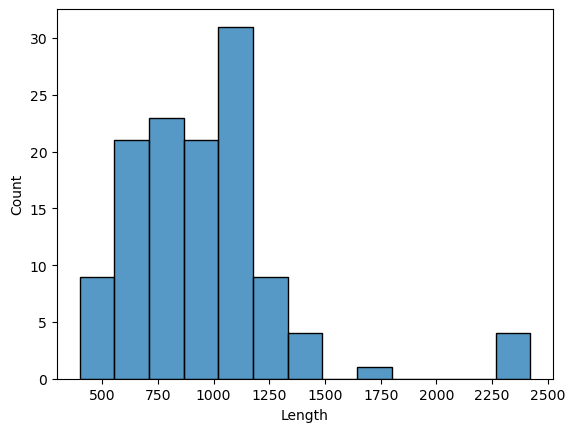

In [149]:
sns.histplot(data=png_data, x="Length")

Mostly 1kb, a few much longer - partial plastid genomes?

How many of each type of locus do we have?

In [148]:
png_data.Region.value_counts()

unkn          77
ndhF-rpL32    19
ribosomal     17
ITS            8
plastid        2
Name: Region, dtype: int64

Looks like the coding of Region was not great.  Have a look at the unkn and see if I can do better?

In [150]:
unkn_region = png_data[png_data['Region']  == 'unkn']
unkn_region['Sample']

4      1271. Begonia ulmifolia trnC-trnD intergenic s...
5      2332. Begonia ulmifolia voucher Brown, K. 2155...
7      2362. Begonia ulmifolia voucher Brown, K. 2155...
8      2440. Begonia ulmifolia voucher C.-I Peng 2251...
9      2441. Begonia ulmifolia voucher K. Brown 21551...
                             ...                        
118    4717. Begonia symsanguinea voucher Glasgow Bot...
119    4746. Begonia symsanguinea voucher Glasgow Bot...
120    4775. Begonia symsanguinea voucher Glasgow Bot...
121    4804. Begonia symsanguinea voucher Glasgow Bot...
122    4833. Begonia symsanguinea voucher Glasgow Bot...
Name: Sample, Length: 77, dtype: object

Seeing more of the data

In [159]:
pd.options.display.max_rows = 999
pd.set_option('max_colwidth', None)
unkn_region['Sample'], 

(4                                                                                                                                                                         1271. Begonia ulmifolia trnC-trnD intergenic spacer region, chloroplast sequence
 5                                                                                                                                        2332. Begonia ulmifolia voucher Brown, K. 21551 (LBG) rpL32-trnL intergenic spacer, partial sequence; chloroplast
 7                                                                                                                                      2362. Begonia ulmifolia voucher Brown, K. 21551 (LBG) NADH dehydrogenase subunit 1 (ndhA) gene, intron; chloroplast
 8                                                                                                                                       2440. Begonia ulmifolia voucher C.-I Peng 22518 (HAST) rpL32-trnL intergenic spacer, partial sequence; chlo

In [168]:
def which_region(info):
    if 'ribosomal' in info:
        return 'ribosomal'
    elif 'ITS' in info:
        return 'ITS'
    elif 'trn' in info:
        return 'trn'
    elif 'ndh' in info:
        return 'ndh'
    elif 'nad' in info:
        return 'nad'
    elif 'rbcL' in info:
        return 'rbcL'
    elif 'cox1' in info:
        return 'cox1'
    elif 'petB' in info:
        return 'petB'
    elif 'psb' in info:
        return 'psb'
    elif 'matR' in info:
        return 'matR'
    elif 'plastid' in info:
        return 'plastid'
    elif 'mitochondrial' in info:
        return 'mitochondrial'
    elif 'nuclear' in info:
        return 'nuclear'
    else:
        return 'unkn'

In [170]:
png_data['Region'] = png_data.apply(lambda png_data: which_region(png_data['Sample']),axis=1)

In [171]:
png_data.Region.value_counts()

trn              38
ndh              36
ribosomal        17
rbcL              8
ITS               8
nad               6
matR              2
cox1              2
psb               2
mitochondrial     2
petB              2
Name: Region, dtype: int64

<AxesSubplot:xlabel='Length', ylabel='Count'>

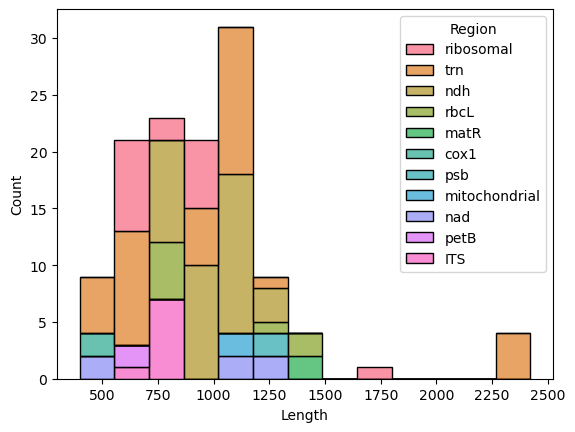

In [172]:
sns.histplot(data=png_data, x="Length", hue = 'Region', multiple="stack")

This is quite messy.  What about showing just by the genome?

In [186]:
def which_genome(info):
    if 'mitochondrial' in info:
        return 'Mitochondria'
    elif 'nuclear' in info:
        return 'Nuclear'
    if 'plastid' in info:
        return 'Plastid'
    if 'chloroplast' in info:
        return 'Plastid'
    elif 'ITS' in info:
        return 'Nuclear'
    elif 'ribosomal' in info:
        return 'Plastid'
    elif 'ndh' in info:
        return 'Plastid'
    elif 'nad' in info:
        return 'Plastid'
    elif 'rbcL' in info:
        return 'Nuclear'
    elif 'cox1' in info:
        return 'Mitochondria'
    elif 'petB' in info:
        return 'Plastid'
    elif 'psb' in info:
        return 'Plastid'
    elif 'matR' in info:
        return 'Plastid'
    elif 'plastid' in info:
        return 'Plastid'
    else:
        return 'unkn'

In [187]:
png_data['Genome'] = png_data.apply(lambda png_data: which_genome(png_data['Sample']),axis=1)

<AxesSubplot:xlabel='Length', ylabel='Count'>

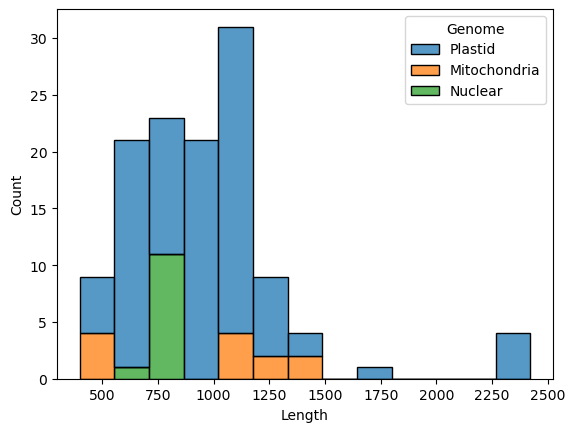

In [188]:
sns.histplot(data=png_data, x="Length", hue = 'Genome', multiple="stack")

With 123 sequences, and 87 species we clearly have multiple sequences for some species.  How many of the species do we have any sequence for?

In [189]:
png_data.Species.value_counts()

ulmifolia            30
aptera               21
symsanguinea         18
brevirimosa          12
koordersii            8
pseudolateralis       7
bipinnatifida         6
serratipetala         6
gesnerioides          3
augustae              3
weigallii             3
argenteomarginata     3
strigosa              3
Name: Species, dtype: int64

<AxesSubplot:xlabel='Length', ylabel='Count'>

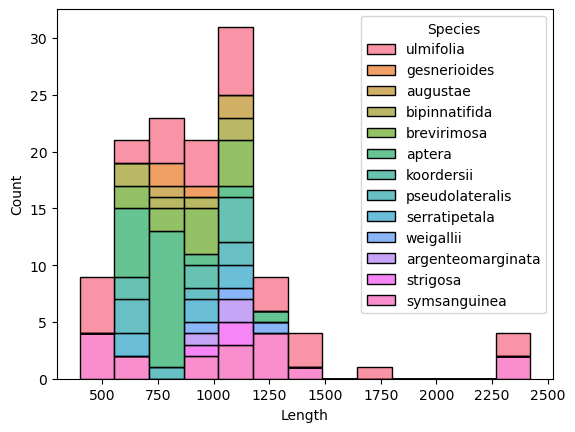

In [192]:
sns.histplot(data=png_data, x="Length", hue = 'Species', multiple="stack")

This is pretty horrible.  It would be good to show genome and species and length.  Two categorical and one numerical class.  Looking back at class 5 provides some ideas.

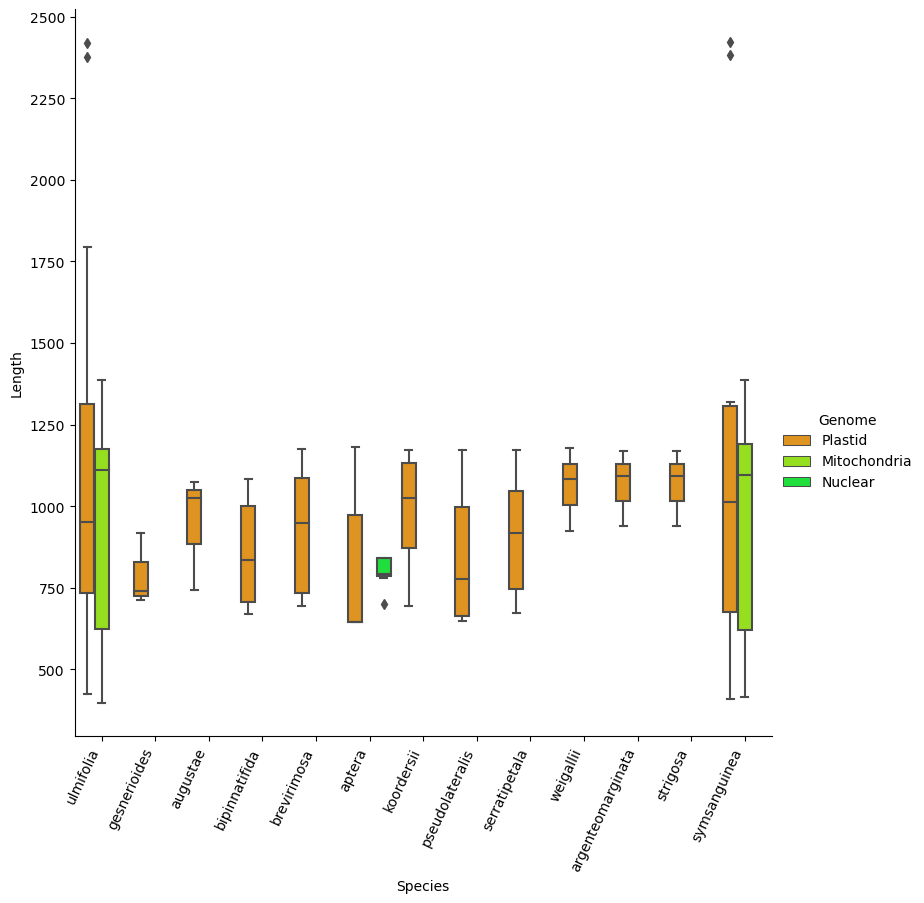

In [195]:
sns.set_palette("gist_rainbow")
chart = sns.catplot(data=png_data, kind = "box", x="Species", y="Length", height = 8, hue="Genome")
chart.set_xticklabels(rotation=65, horizontalalignment='right')
chart

All the speices we have sequnece from have some plastid sequence.  To complete the dataset it woudl be sensible to get plastid sequence from the rest.  
We need a list of the species without sequence.  We have a dataframe of the PNG species and of the ones with sequence data.  We can turn the species columns into a list of the species with data.  We then use python to find the missing species.

In [196]:
png_species.head()

,Genus,Species,Authority
0,Begonia,L.,None
1,Begonia,sharpeana,F.Muell.
2,Begonia,Sect.,Trilobaria A.DC.
3,Begonia,acaulis,Merr. & L.M.Perry
4,Begonia,bartlettiana,Merr. & L.M.Perry


In [197]:
png_data.head()

,Genus,Species,Authority,Accession_N,GenInfo,Length,Region,Sample,Genome
0,Begonia,ulmifolia,Willd.,AF485179.1,GI:33320590,705,ribosomal,"61. Begonia ulmifolia voucher L.L. Forrest 169 (E) internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence",Plastid
1,Begonia,ulmifolia,Willd.,KP713273.1,GI:896689772,894,trn,"895. Begonia ulmifolia isolate EDNA12-0025425 rpL32-trnL intergenic spacer, partial sequence; plastid",Plastid
2,Begonia,ulmifolia,Willd.,KP713135.1,GI:896689634,733,ndh,"1020. Begonia ulmifolia isolate EDNA12-0025425 ndhF-rpL32 intergenic spacer, partial sequence; plastid",Plastid
3,Begonia,ulmifolia,Willd.,KP713043.1,GI:896689542,1115,ndh,"1105. Begonia ulmifolia isolate EDNA120025425 NADH dehydrogenase subunit 1 (ndhA) gene, intron; plastid",Plastid
4,Begonia,ulmifolia,Willd.,AF536802.1,GI:33331022,1310,trn,"1271. Begonia ulmifolia trnC-trnD intergenic spacer region, chloroplast sequence",Plastid


In [198]:
PNG_list = png_species.Species.values.tolist()
PNG_seq = png_data.Species.values.tolist()

In [200]:
 set(PNG_list).difference(PNG_seq)

{'L.',
 'Sect.',
 'acaulis',
 'aikrono',
 'arauensis',
 'archboldiana',
 'asaroensis',
 'axillipara',
 'bartlettiana',
 'brachybotrys',
 'brachyptera',
 'calleryana',
 'calliantha',
 'chambersiae',
 'clemensiae',
 'dasycarpa',
 'diffusiflora',
 'djamuensis',
 'dosedlae',
 'elianii',
 'eliasii',
 'erodifolia',
 'exotica',
 'filibracteosa',
 'fractalifolia',
 'fulvo-villosa',
 'gilgiana',
 'glabricaulis',
 'hirsuticaulis',
 'jairii',
 'kaniensis',
 'kelliana',
 'kerstingii',
 'lateralis',
 'lauterbachii',
 'ledermannii',
 'maguniana',
 'malmquistiana',
 'media',
 'minjemensis',
 'monantha',
 'montis-bismarckii',
 'mooreana',
 'multidentata',
 'naumoniensis',
 'novoguineensis',
 'oligandra',
 'papuana',
 'pediophylla',
 'peekelii',
 'pentandra',
 'physandra',
 'pinnatifida',
 'randiana',
 'rieckei',
 'salomonensis',
 'sandaunensis',
 'sandsiana',
 'sharpeana',
 'simulans',
 'sogerensis',
 'spilotophylla',
 'stilandra',
 'strictinervis',
 'strictipetiolaris',
 'subcyclophylla',
 'suffrutes

We have a lot of work to do.